# Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

In [22]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

In [23]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [24]:
data.shape

(32561, 15)

This dataset consists of 32,561 instances and 15 attributes.

In [25]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

For the better understanding we can change the income group as 0 for those whose income is less than or equal to 50k and 1 for those whose income is higher than 50k.

In [26]:
data['income']=data['income'].map({'<=50K': 0, '>50K': 1})

Now we need to check whether all the attributes has corresponding datatype

In [27]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income             int64
dtype: object

By overviewing the dataset we came to know some of the instances consists of '?' which corresponds to nothing.

In [28]:
def cc(x):
    return sum(x=='?')
data.apply(cc)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Totally 3 attributes consists of '?' on many instances. Therefore we need to convert it into NAN and required to fill those with some techniques.

In [29]:
data.replace("?",np.nan,inplace=True)

In [30]:
def cc(x):
    return sum(x=='?')
data.apply(cc)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Now there is no instances consists of '?'. But there is NAN values.

In [31]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [32]:
data.isnull().sum()/len(data)*100

age              0.000000
workclass        5.638647
fnlwgt           0.000000
education        0.000000
education.num    0.000000
marital.status   0.000000
occupation       5.660146
relationship     0.000000
race             0.000000
sex              0.000000
capital.gain     0.000000
capital.loss     0.000000
hours.per.week   0.000000
native.country   1.790486
income           0.000000
dtype: float64

If there is more than 40% of instances in an attribute consists of NAN values we can neglect that. But here in this dataset, around 5% data only has NAN values so we need to fill it with appropriate techniques.

In [35]:
for column in ['workclass','occupation','native.country']:
    data[column].fillna(data[column].mode()[0],inplace=True)

Since the 3 attributes which has NAN values are of object type, we can fill it with mode. Which is nothing but filling those instances with higher occurences of other instances.

In [36]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Now there is no NAN values.

In [14]:
data['native.country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [37]:
data['native.country'].value_counts()/len(data)*100

United-States                91.376186
Mexico                        1.974755
Philippines                   0.608089
Germany                       0.420749
Canada                        0.371610
Puerto-Rico                   0.350112
El-Salvador                   0.325543
India                         0.307116
Cuba                          0.291760
England                       0.276404
Jamaica                       0.248764
South                         0.245693
China                         0.230337
Italy                         0.224195
Dominican-Republic            0.214981
Vietnam                       0.205768
Guatemala                     0.196554
Japan                         0.190412
Poland                        0.184270
Columbia                      0.181198
Taiwan                        0.156629
Haiti                         0.135131
Iran                          0.132060
Portugal                      0.113633
Nicaragua                     0.104419
Peru                     

Since 91% of data has the people from United states we assume rest has others.

In [38]:
data.loc[data['native.country']!='United-States','native.country'] = 'Others'

In [39]:
data['native.country'].value_counts()

United-States    29753
Others            2808
Name: native.country, dtype: int64

Since the attribute 'education.num' and income is denoted as integer type we can change it into categorical type.

In [40]:
data['education.num'] = data['education.num'].astype('object')
data['income'] = data['income'].astype('object')

In [41]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num     object
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Now we have done all the basic requirements to process the data.

In [42]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


Check whether there is an outliers.

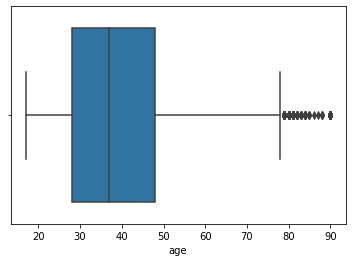

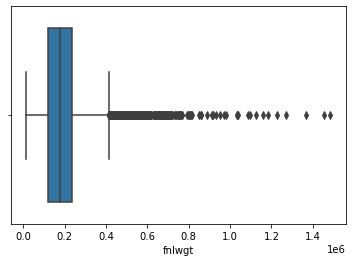

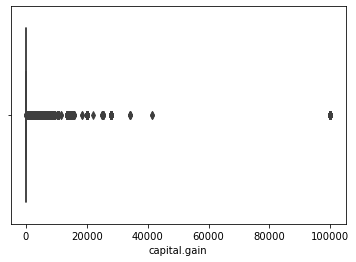

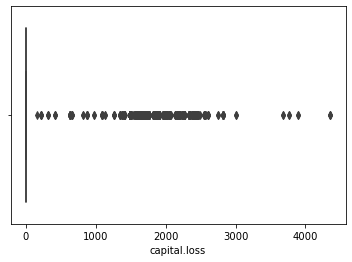

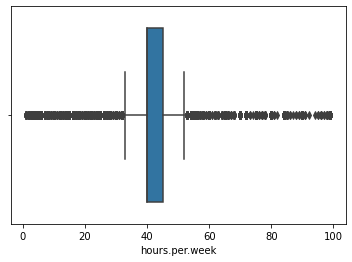

In [43]:
num=data.select_dtypes(include=np.number)
for i in num.columns:
    sns.boxplot(data[i])
    plt.show()

There are many outliers in the data. But they are important and not negligible in predicting the income. So we can go with the data with the presence of outliers.

In [44]:
data['income'] = data['income'].astype('int')

In [45]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [46]:
target = data.income
features = data.drop('income',1)

Now we need to separate the dataset based on the datatypes so that we can do scaling for numerical data and encoding for categorical data.

In [50]:
df_num = features.select_dtypes(include = [np.number])
df_cat = features.select_dtypes(exclude = [np.number])

In [51]:
print(df_num.columns)
print(df_cat.columns)

Index(['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week'], dtype='object')
Index(['workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'native.country'],
      dtype='object')


We use label encoder for encoding the categorical data.

In [53]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in df_cat.columns:
    df_cat[i]=lab.fit_transform(df_cat[i])

In [54]:
df_cat.head()

,workclass,education,education.num,marital.status,occupation,relationship,race,sex,native.country
0,3,11,8,6,9,1,4,0,1
1,3,11,8,6,3,1,4,0,1
2,3,15,9,6,9,4,2,0,1
3,3,5,3,0,6,4,4,0,1
4,3,15,9,5,9,3,4,0,1


We use standard scaler for scaling the numerical data.

In [55]:
# initialize the standard scalar
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

In [56]:
X = pd.concat([df_num_scaled, df_cat], axis = 1)

In [57]:
X.head()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,workclass,education,education.num,marital.status,occupation,relationship,race,sex,native.country
0,3.769612,-1.067997,-0.145920,10.593507,-0.035429,3,11,8,6,9,1,4,0,1
1,3.183112,-0.539169,-0.145920,10.593507,-1.817204,3,11,8,6,3,1,4,0,1
2,2.010110,-0.035220,-0.145920,10.593507,-0.035429,3,15,9,6,9,4,2,0,1
3,1.130359,-0.468215,-0.145920,9.461864,-0.035429,3,5,3,0,6,4,4,0,1
4,0.177296,0.709482,-0.145920,9.461864,-0.035429,3,15,9,5,9,3,4,0,1


Now we have done all the required preprocessing steps and set to go with model building.

# Building a base model (Logistic Regression)

In [58]:
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# to built the basic lr model we need a constant column
Xc = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(Xc, target, random_state = 10, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (22792, 15)
y_train (22792,)
X_test (9769, 15)
y_test (9769,)


In [59]:
X_train.head()

,const,age,fnlwgt,capital.gain,capital.loss,hours.per.week,workclass,education,education.num,marital.status,occupation,relationship,race,sex,native.country
17863,1.000000,2.156735,0.083143,-0.145920,-0.216660,-1.655225,5,15,9,0,13,1,4,0,1
22456,1.000000,0.397233,0.233416,-0.145920,-0.216660,-0.035429,3,15,9,5,9,4,2,0,1
8952,1.000000,1.276984,-1.525835,-0.145920,-0.216660,-0.035429,3,1,6,5,6,1,4,0,1
28830,1.000000,0.397233,-0.926868,-0.145920,-0.216660,-0.035429,3,11,8,4,9,4,2,0,1
17063,1.000000,0.690484,1.702951,-0.145920,-0.216660,-1.250276,4,9,12,2,3,5,4,0,1


In [60]:
y_train.head()

17863    0
22456    0
8952     0
28830    0
17063    1
Name: income, dtype: int32

In [61]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train,y_train)
#logreg = lr(X_train, y_train).fit()

# print the summary of the model
#print(logreg.summary())

In [62]:
y_pred = lr.predict(X_test)

In [63]:
from sklearn.metrics import classification_report,accuracy_score

In [64]:
print('Accuracy score train model:', lr.score(X_train,y_train))
print('Accuracy score test model:', accuracy_score(y_test,y_pred))

Accuracy score train model: 0.8255089505089505
Accuracy score test model: 0.8226021087112294


# The accuracy of the model both on train and test dataset gives the best without any overfitting. Now we will try with some other models to obtain better accuracy.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state = 10, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (22792, 14)
y_train (22792,)
X_test (9769, 14)
y_test (9769,)


# Gaussian Naive Bayes model

In [66]:
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(X_train, y_train)

In [67]:
def plot_confusion_matrix(model):
    
    # predict the target values using X_test
    y_pred = model.predict(X_test)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

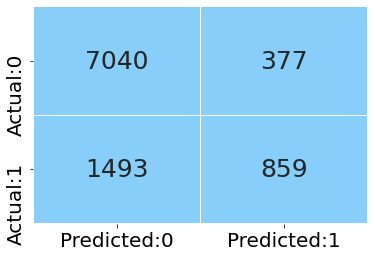

In [68]:
plot_confusion_matrix(gnb_model)

In [69]:
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

In [70]:
test_report = get_test_report(gnb_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      7417
           1       0.69      0.37      0.48      2352

    accuracy                           0.81      9769
   macro avg       0.76      0.66      0.68      9769
weighted avg       0.79      0.81      0.79      9769



In [71]:
y_pred = gnb.predict(X_test)

print('Accuracy score train model:', gnb.score(X_train,y_train))
print('Accuracy score test model:', accuracy_score(y_test,y_pred))

Accuracy score train model: 0.8083099333099333
Accuracy score test model: 0.8085781553894974


# With this model the accuracy reaches only 80%.

In [72]:
def plot_roc(model):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Income Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

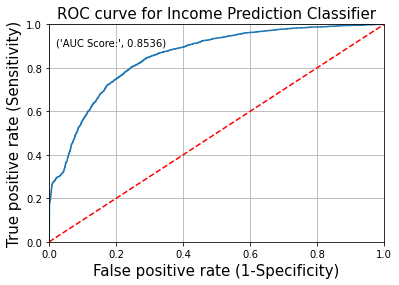

In [73]:
plot_roc(gnb_model)

# Bernoulli Naive Bayes model

In [74]:
from sklearn.naive_bayes import BernoulliNB

In [75]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_predict = bnb.predict(X_test)

print('Accuracy score train model:', bnb.score(X_train,y_train))
print('Accuracy score test model:', accuracy_score(y_test,y_predict))

Accuracy score train model: 0.7713671463671463
Accuracy score test model: 0.7679394001433105


# The accuracy reaches 77% and not so good as compared with previous two models.

# K Nearest Neighbors model

In [76]:
k_range = np.arange(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores.index(max(scores)), max(scores))

12 0.8318149247620023


With 12 nearest neighbors this model will give good accuracy

In [77]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train, y_train) 
Y_pred = knn.predict(X_test)

In [78]:
print('Accuracy score train model:', knn.score(X_train,y_train))
print('Accuracy score test model:', accuracy_score(y_test,Y_pred))

Accuracy score train model: 0.8553001053001053
Accuracy score test model: 0.8315078308936431


# The accuracy reaches 85% on train and 83% on test and slightly overfitting. So we will go and check with other models.

# Decision tree model

In [125]:
param = ({'criterion':['entropy','gini'],'min_samples_leaf':[10,15,20],'min_samples_split':[10,15,20],'max_depth':[3,4,5,6,7,8,9]})
dt = DecisionTreeClassifier(random_state=10)
grid_dt = GridSearchCV(dt,param_grid=param,cv=5)
grid_dt.fit(X_train,y_train)
print(grid_dt.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 10}


With grid search cv we obtained the best parameters for model building. With these parameters we will built a decision tree model.

In [79]:
dt_entropy8 = DecisionTreeClassifier(criterion = 'entropy',max_depth=8,min_samples_leaf=20,min_samples_split=10, random_state = 10)

# fit the model using fit() on train data
dt_entropy8.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=20,
                       min_samples_split=10, random_state=10)

In [80]:
y_pred_dt = dt_entropy8.predict(X_test)

In [81]:
print('Accuracy score train model:', dt_entropy8.score(X_train,y_train))
print('Accuracy score test model:', accuracy_score(y_test,y_pred_dt))

Accuracy score train model: 0.8585907335907336
Accuracy score test model: 0.8504452861091207


# The accuracy reaches 85% without any overfitting which is better than above models.

# Random forest Classifier model

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
param = ({'criterion':['entropy','gini'],'n_estimators':[10,20,30,40,50,60,70],'min_samples_leaf':[10,15,20]})
rf1 = RandomForestClassifier(random_state=10)
grid_rf1 = GridSearchCV(rf1,param_grid=param,cv=5)
grid_rf1.fit(X_train,y_train)
print(grid_rf1.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 10, 'n_estimators': 70}


With grid search cv we obtained the best parameters for model building. With these parameters we will built a random forest classifier model.

In [83]:
rf_entropy =  RandomForestClassifier(criterion='entropy',n_estimators=70,min_samples_leaf=10,random_state=10)
rf_entropy.fit(X_train,y_train)
y_pred_rf = rf_entropy.predict(X_test)

In [84]:
print('Accuracy score train model:', rf_entropy.score(X_train,y_train))
print('Accuracy score test model:', accuracy_score(y_test,y_pred_rf))

Accuracy score train model: 0.8804843804843805
Accuracy score test model: 0.8608864776333299


# The accuracy reaches 88% on train and 86% on test which is good.

We can choose which features are most important among these attributes.

In [135]:
rf_entropy.feature_importances_

array([0.12631578, 0.04413102, 0.16453462, 0.02995294, 0.0659936 ,
       0.01425463, 0.04482748, 0.12495921, 0.12840231, 0.03936435,
       0.18955916, 0.00541142, 0.01995315, 0.00234033])

In [137]:
rf_feature = pd.DataFrame({'Feature':X_train.columns,'Importance':rf_entropy.feature_importances_})

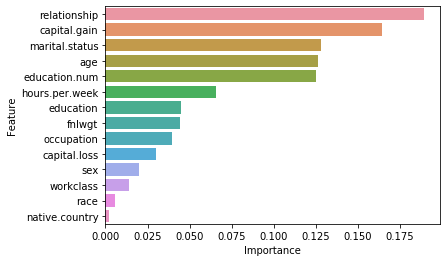

In [138]:
rf_feature = rf_feature.sort_values('Importance',ascending=False)
sns.barplot(x='Importance',y='Feature',data=rf_feature)

The top 5 important features are relationship, capital gain, marital status, age, education num. 

In [139]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

In [140]:
from sklearn.ensemble import BaggingClassifier

In [141]:
bag_lr = BaggingClassifier(base_estimator=lr)
bag_knn = BaggingClassifier(base_estimator=knn)
bag_dt = BaggingClassifier(base_estimator=dt)

In [142]:
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
bag_lr.fit(X_train,y_train)
bag_knn.fit(X_train,y_train)
bag_dt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [143]:
ypred_lr=lr.predict(X_test)
ypred_knn=knn.predict(X_test)
ypred_dt=dt.predict(X_test)
ypred_bag_lr=bag_lr.predict(X_test)
ypred_bag_knn=bag_knn.predict(X_test)
ypred_bag_dt=bag_dt.predict(X_test)

In [144]:
print('Accuracy of train lr model:',lr.score(X_train,y_train))
print('Accuracy of test lr model:',accuracy_score(y_test,ypred_lr))

print('Accuracy of train knn model:',knn.score(X_train,y_train))
print('Accuracy of test knn model:',accuracy_score(y_test,ypred_knn))

print('Accuracy of train dt model:',dt.score(X_train,y_train))
print('Accuracy of test dt model:',accuracy_score(y_test,ypred_dt))

print('Accuracy of train bag_lr model:',bag_lr.score(X_train,y_train))
print('Accuracy of test bag_lr model:',accuracy_score(y_test,ypred_bag_lr))

print('Accuracy of train bag_knn model:',bag_knn.score(X_train,y_train))
print('Accuracy of test bag_knn model:',accuracy_score(y_test,ypred_bag_knn))

print('Accuracy of train bag_dt model:',bag_dt.score(X_train,y_train))
print('Accuracy of test bag_dt model:',accuracy_score(y_test,ypred_bag_dt))

Accuracy of train lr model: 0.8254650754650754
Accuracy of test lr model: 0.8223973794656567
Accuracy of train knn model: 0.8777641277641277
Accuracy of test knn model: 0.8256730473948204
Accuracy of train dt model: 0.999956124956125
Accuracy of test dt model: 0.8134916572832429
Accuracy of train bag_lr model: 0.8260793260793261
Accuracy of test bag_lr model: 0.8224997440884431
Accuracy of train bag_knn model: 0.8789048789048789
Accuracy of test bag_knn model: 0.8273108813594022
Accuracy of train bag_dt model: 0.9873201123201123
Accuracy of test bag_dt model: 0.8410277408127751


In [145]:
bag_lr1 = BaggingClassifier(base_estimator=lr,oob_score=True,random_state=10)
bag_knn1 = BaggingClassifier(base_estimator=knn,oob_score=True,random_state=10)
bag_dt1 = BaggingClassifier(base_estimator=dt,oob_score=True,random_state=10)

In [146]:
bag_lr1.fit(X_train,y_train)
bag_knn1.fit(X_train,y_train)
bag_dt1.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), oob_score=True,
                  random_state=10)

In [147]:
print(bag_lr1.oob_score_)
print(bag_knn1.oob_score_)
print(bag_dt1.oob_score_)

0.8252018252018252
0.8262987012987013
0.8333625833625834


In [148]:
ypred_bag_lr1 = bag_lr1.predict(X_test)
ypred_bag_knn1 = bag_knn1.predict(X_test)
ypred_bag_dt1 = bag_dt1.predict(X_test)

In [149]:
print('Accuracy of train bag_lr1 model:',bag_lr1.score(X_train,y_train))
print('Accuracy of bag_lr1 model:',accuracy_score(y_test,ypred_bag_lr1))

print('Accuracy of train bag_knn1 model:',bag_knn1.score(X_train,y_train))
print('Accuracy of bag_knn1 model:',accuracy_score(y_test,ypred_bag_knn1))

print('Accuracy of train bag_dt1 model:',bag_dt1.score(X_train,y_train))
print('Accuracy of bag_dt1 model:',accuracy_score(y_test,ypred_bag_dt1))

Accuracy of train bag_lr1 model: 0.8261232011232011
Accuracy of bag_lr1 model: 0.8236257549390931
Accuracy of train bag_knn1 model: 0.8814057564057564
Accuracy of bag_knn1 model: 0.8280274337189067
Accuracy of train bag_dt1 model: 0.9864864864864865
Accuracy of bag_dt1 model: 0.8438939502507933


# Out of all these bagging classifier methods we used here gives less accuracy than decision tree and random forest orelse has a overfitting.

# Ada Boost Classifier model

In [85]:
from sklearn.ensemble import AdaBoostClassifier

In [86]:
abcl = AdaBoostClassifier(random_state=10)

In [87]:
abcl.fit(X_train,y_train)

AdaBoostClassifier(random_state=10)

In [88]:
ypred_abcl = abcl.predict(X_test)

In [89]:
print('Accuracy score abcl train model:', abcl.score(X_train,y_train))
print('Accuracy of abcl model:',accuracy_score(y_test,ypred_abcl))

Accuracy score abcl train model: 0.8608283608283608
Accuracy of abcl model: 0.8593510082915344


# The AdaBoost Classifier model gives the best accuracy of around 86%.

In [90]:
params = {'n_estimators':[1,2,3,4,5,6,7,8,9,10]}
ab = AdaBoostClassifier(random_state=10)
grid_ab = GridSearchCV(estimator=ab,param_grid=params,cv=5,scoring='accuracy')
grid_ab.fit(X_train,y_train)
print(grid_ab.best_params_)

{'n_estimators': 9}


In [91]:
ab_9 = AdaBoostClassifier(n_estimators=9,random_state=10)
ab_9.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=9, random_state=10)

In [92]:
ypred_ab_9=ab_9.predict(X_test)

In [93]:
print('Accuracy score ab_9 train model:', ab_9.score(X_train,y_train))
print('Accuracy of ab_9 model:',accuracy_score(y_test,ypred_ab_9))

Accuracy score ab_9 train model: 0.8507809757809758
Accuracy of ab_9 model: 0.8491145460128979


# With n_estimators as 9, the model gives the best accuracy of around 85%

# Gradient Boosting Classifier model

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
gb = GradientBoostingClassifier(random_state=10)

In [96]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=10)

In [97]:
ypred_gb = gb.predict(X_test)

In [98]:
print('Accuracy of gb model:',accuracy_score(y_test,ypred_gb))
print('Accuracy score gb train model:', gb.score(X_train,y_train))

Accuracy of gb model: 0.8627290408434845
Accuracy score gb train model: 0.8687697437697438


# The model Gradient Boosting gives the best accuracy of around 86% without any overfitting.

# XGBoost Classifier model

In [99]:
from xgboost import XGBClassifier

In [100]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
ypred_xgb = xgb.predict(X_test)

print('Accuracy of xgb model:',accuracy_score(y_test,ypred_xgb))
print('Accuracy score xgb train model:', xgb.score(X_train,y_train))

[13:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of xgb model: 0.8656976149042891
Accuracy score xgb train model: 0.9117234117234118


# The model xgboost gives best accuracy on train but it is overfitting on test data. 

In [ ]:
params = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}
xgb=XGBClassifier()
grid_xgb = GridSearchCV(estimator = xgb, param_grid = params, cv = 5, scoring = 'accuracy')
grid_xgb.fit(X_train,y_train)
print(grid_xgb.best_params_)

In [108]:
xgb_final = XGBClassifier(gamma=0.1,learning_rate=0.2,max_depth=3,random_state=10)
xgb_final.fit(X_train,y_train)

[14:26:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
ypred_xgb_final = xgb_final.predict(X_test)

print('Accuracy of xgb model:',accuracy_score(y_test,ypred_xgb_final))
print('Accuracy score xgb train model:', xgb_final.score(X_train,y_train))

Accuracy of xgb model: 0.8694851059473846
Accuracy score xgb train model: 0.8776325026325026


# The model xgboost with selected parameters gives best accuracy of around 87% without much overfitting it is considered as the best among all the above models.

# Stacking Classifier model

In [110]:
from sklearn.ensemble import StackingClassifier
# define the base models
level_0 = list()
level_0.append(('lr', LogisticRegression()))
level_0.append(('knn', KNeighborsClassifier()))
level_0.append(('cart', DecisionTreeClassifier()))
level_0.append(('bayes', BernoulliNB()))

# define meta learner model
level_1 = LogisticRegression()

# define the stacking ensemble
model = StackingClassifier(estimators=level_0, final_estimator=level_1, cv=5)

In [111]:
model.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('bayes', BernoulliNB())],
                   final_estimator=LogisticRegression())

In [112]:
ypred_smodel = model.predict(X_test)

In [113]:
print('Accuracy score stacking train model:', model.score(X_train,y_train))
print('Accuracy of stacking model:',accuracy_score(y_test,ypred_smodel))

Accuracy score stacking train model: 0.9022025272025272
Accuracy of stacking model: 0.8410277408127751


# The Stacking classifier model is overfitting

# Voting Classifier model

In [119]:
from sklearn.ensemble import VotingClassifier

In [120]:
hard_model = VotingClassifier(estimators=level_0, voting='hard')

In [121]:
hard_model.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('cart', DecisionTreeClassifier()),
                             ('bayes', BernoulliNB())])

In [122]:
ypred_hard_vote = hard_model.predict(X_test)

In [123]:
print('Accuracy score hard voting train model:', hard_model.score(X_train,y_train))
print('Accuracy of hard voting model:',accuracy_score(y_test,ypred_hard_vote))

Accuracy score hard voting train model: 0.8918041418041418
Accuracy of hard voting model: 0.8337598525949432


# The voting classifier model is also overfitting

In [124]:
soft_model = VotingClassifier(estimators=level_0, voting='soft')

In [125]:
soft_model.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('cart', DecisionTreeClassifier()),
                             ('bayes', BernoulliNB())],
                 voting='soft')

In [126]:
ypred_soft_vote = soft_model.predict(X_test)

In [127]:
print('Accuracy score soft voting train model:', soft_model.score(X_train,y_train))
print('Accuracy of soft voting model:',accuracy_score(y_test,ypred_soft_vote))

Accuracy score soft voting train model: 0.9453755703755704
Accuracy of soft voting model: 0.8344764049544477


# The soft voting model is also overfitting.

# Overall, the model built with XGBoost classifier with selected parameters gives the best accuracy of around 87% without much overfitting and it can be used for the prediction of income in this censes data.

# *END*